# Executive Summary

<u>**Data**:</u> The data is linked to a Portuguese banking institution's direct marketing campaigns. Phone calls were used in the marketing campaigns. More than one interaction with the same client was frequently required in order to determine if the bank term deposit will be subscribed to ('yes') or not ('no').

<u>**Goal**:</u> The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

<u>**Variable Information**:</u>

*bank client data*:
1. age (numeric)   
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means
4. education : (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. balance : average yearly balance, in euros (numeric)
8. loan: has personal loan? (categorical: 'no','yes','unknown')

*Related with the last contact of the current campaign*:
1. contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day: last contact day of the month (numeric 1 -31)
4. duration: last contact duration, in seconds (numeric).

*Other variables*:
campaign: number of contacts performed during this 
1. campaign and for this client (numeric, includes last contact)
2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. previous: number of contacts performed before this campaign and for this client (numeric)
4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','other', 'unknown', 'success')

*Output variable*:


1. y - has the client subscribed a term deposit? (binary: 'yes','no')




In [138]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import sys
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from scipy import stats




# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier

# Data Exploration

In [139]:
#Importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/meetgojiya98/Business_Analytics_MBA6636/main/Assignment%202/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [140]:
# Checking the shape of dataset
df.shape

(45211, 17)

In [141]:
# Checking the columns of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [142]:
# checking data types of all variables
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Apparently, several variables are string objects. 

In [143]:
#Checking if there are any missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [144]:
# converting object types variables to ordinal type 
for v in df.columns:
  if df[v].dtype == 'object':
    df[v] = pd.Categorical(df[v])

In [145]:
# checking the types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [146]:
# printing value counts for each variables
print(df.education.value_counts())
print('\n', df.job.value_counts())
print('\n', df.marital.value_counts())
print('\n', df.default.value_counts())
print('\n', df.housing.value_counts())
print('\n', df.loan.value_counts())
print('\n', df.contact.value_counts())
print('\n', df.month.value_counts())
print('\n', df.poutcome.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 no     44396
yes      815
Name: default, dtype: int64

 yes    25130
no     20081
Name: housing, dtype: int64

 no     37967
yes     7244
Name: loan, dtype: int64

 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

 may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

 unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [147]:
# encoding categorical variables with numerical values
encoded_categories = {
                "job": {"unknown": -1, "blue-collar": 1, "management":2 , "technician": 3, "admin.": 4,"services": 5, 
                         "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10,
                         "student": 11},
                "marital": {"single": 1, "married": 2 ,"divorced": 3},
                "education": {"unknown":-1, "primary": 1, "secondary": 2 ,"tertiary": 3},
                "default": {"no": 0, "yes": 1},
                "housing": {"no": 0, "yes": 1},
                "loan": {"no": 0, "yes": 1},
                "contact": {"unknown": -1 , "cellular": 1, "telephone": 2},
                "month": {"jan": 1, "feb":2 , "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                "poutcome": {"unknown": -1, "failure": 0, "success": 1, "other": 2},
                "y": {"no": 0, "yes": 1} 
                    }
df = df.replace(encoded_categories)

In [148]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,3,0,2143,1,0,-1,5,5,261,1,-1,0,-1,0
1,44,3,1,2,0,29,1,0,-1,5,5,151,1,-1,0,-1,0
2,33,8,2,2,0,2,1,1,-1,5,5,76,1,-1,0,-1,0
3,47,1,2,-1,0,1506,1,0,-1,5,5,92,1,-1,0,-1,0
4,33,-1,1,-1,0,1,0,0,-1,5,5,198,1,-1,0,-1,0


In [149]:
# checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [150]:
# describing the data
df_t = df.describe().T
df_t

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.618212,2.610178,-1.0,2.0,3.0,5.0,11.0
marital,45211.0,1.832275,0.608230,1.0,1.0,2.0,2.0,3.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.488310,0.976936,-1.0,-1.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


we can observe that the mean and the median ages are too close to each other.

In [151]:
# five number summary
df_t[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
age,18.0,33.0,39.0,48.0,95.0
job,-1.0,2.0,3.0,5.0,11.0
marital,1.0,1.0,2.0,2.0,3.0
education,-1.0,2.0,2.0,3.0,3.0
default,0.0,0.0,0.0,0.0,1.0
balance,-8019.0,72.0,448.0,1428.0,102127.0
housing,0.0,0.0,1.0,1.0,1.0
loan,0.0,0.0,0.0,0.0,1.0
contact,-1.0,-1.0,1.0,1.0,2.0
day,1.0,8.0,16.0,21.0,31.0


# Data Visualization

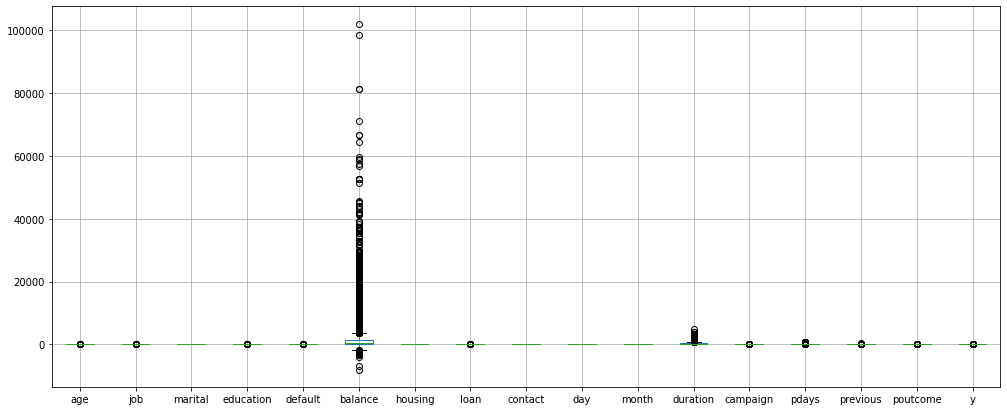

In [152]:
# finding outliers
df.boxplot(return_type='axes', figsize=(17, 7))

It can be clearly seen that there are outliers in the following variables: age, balance, duration, campaign, and pdays.

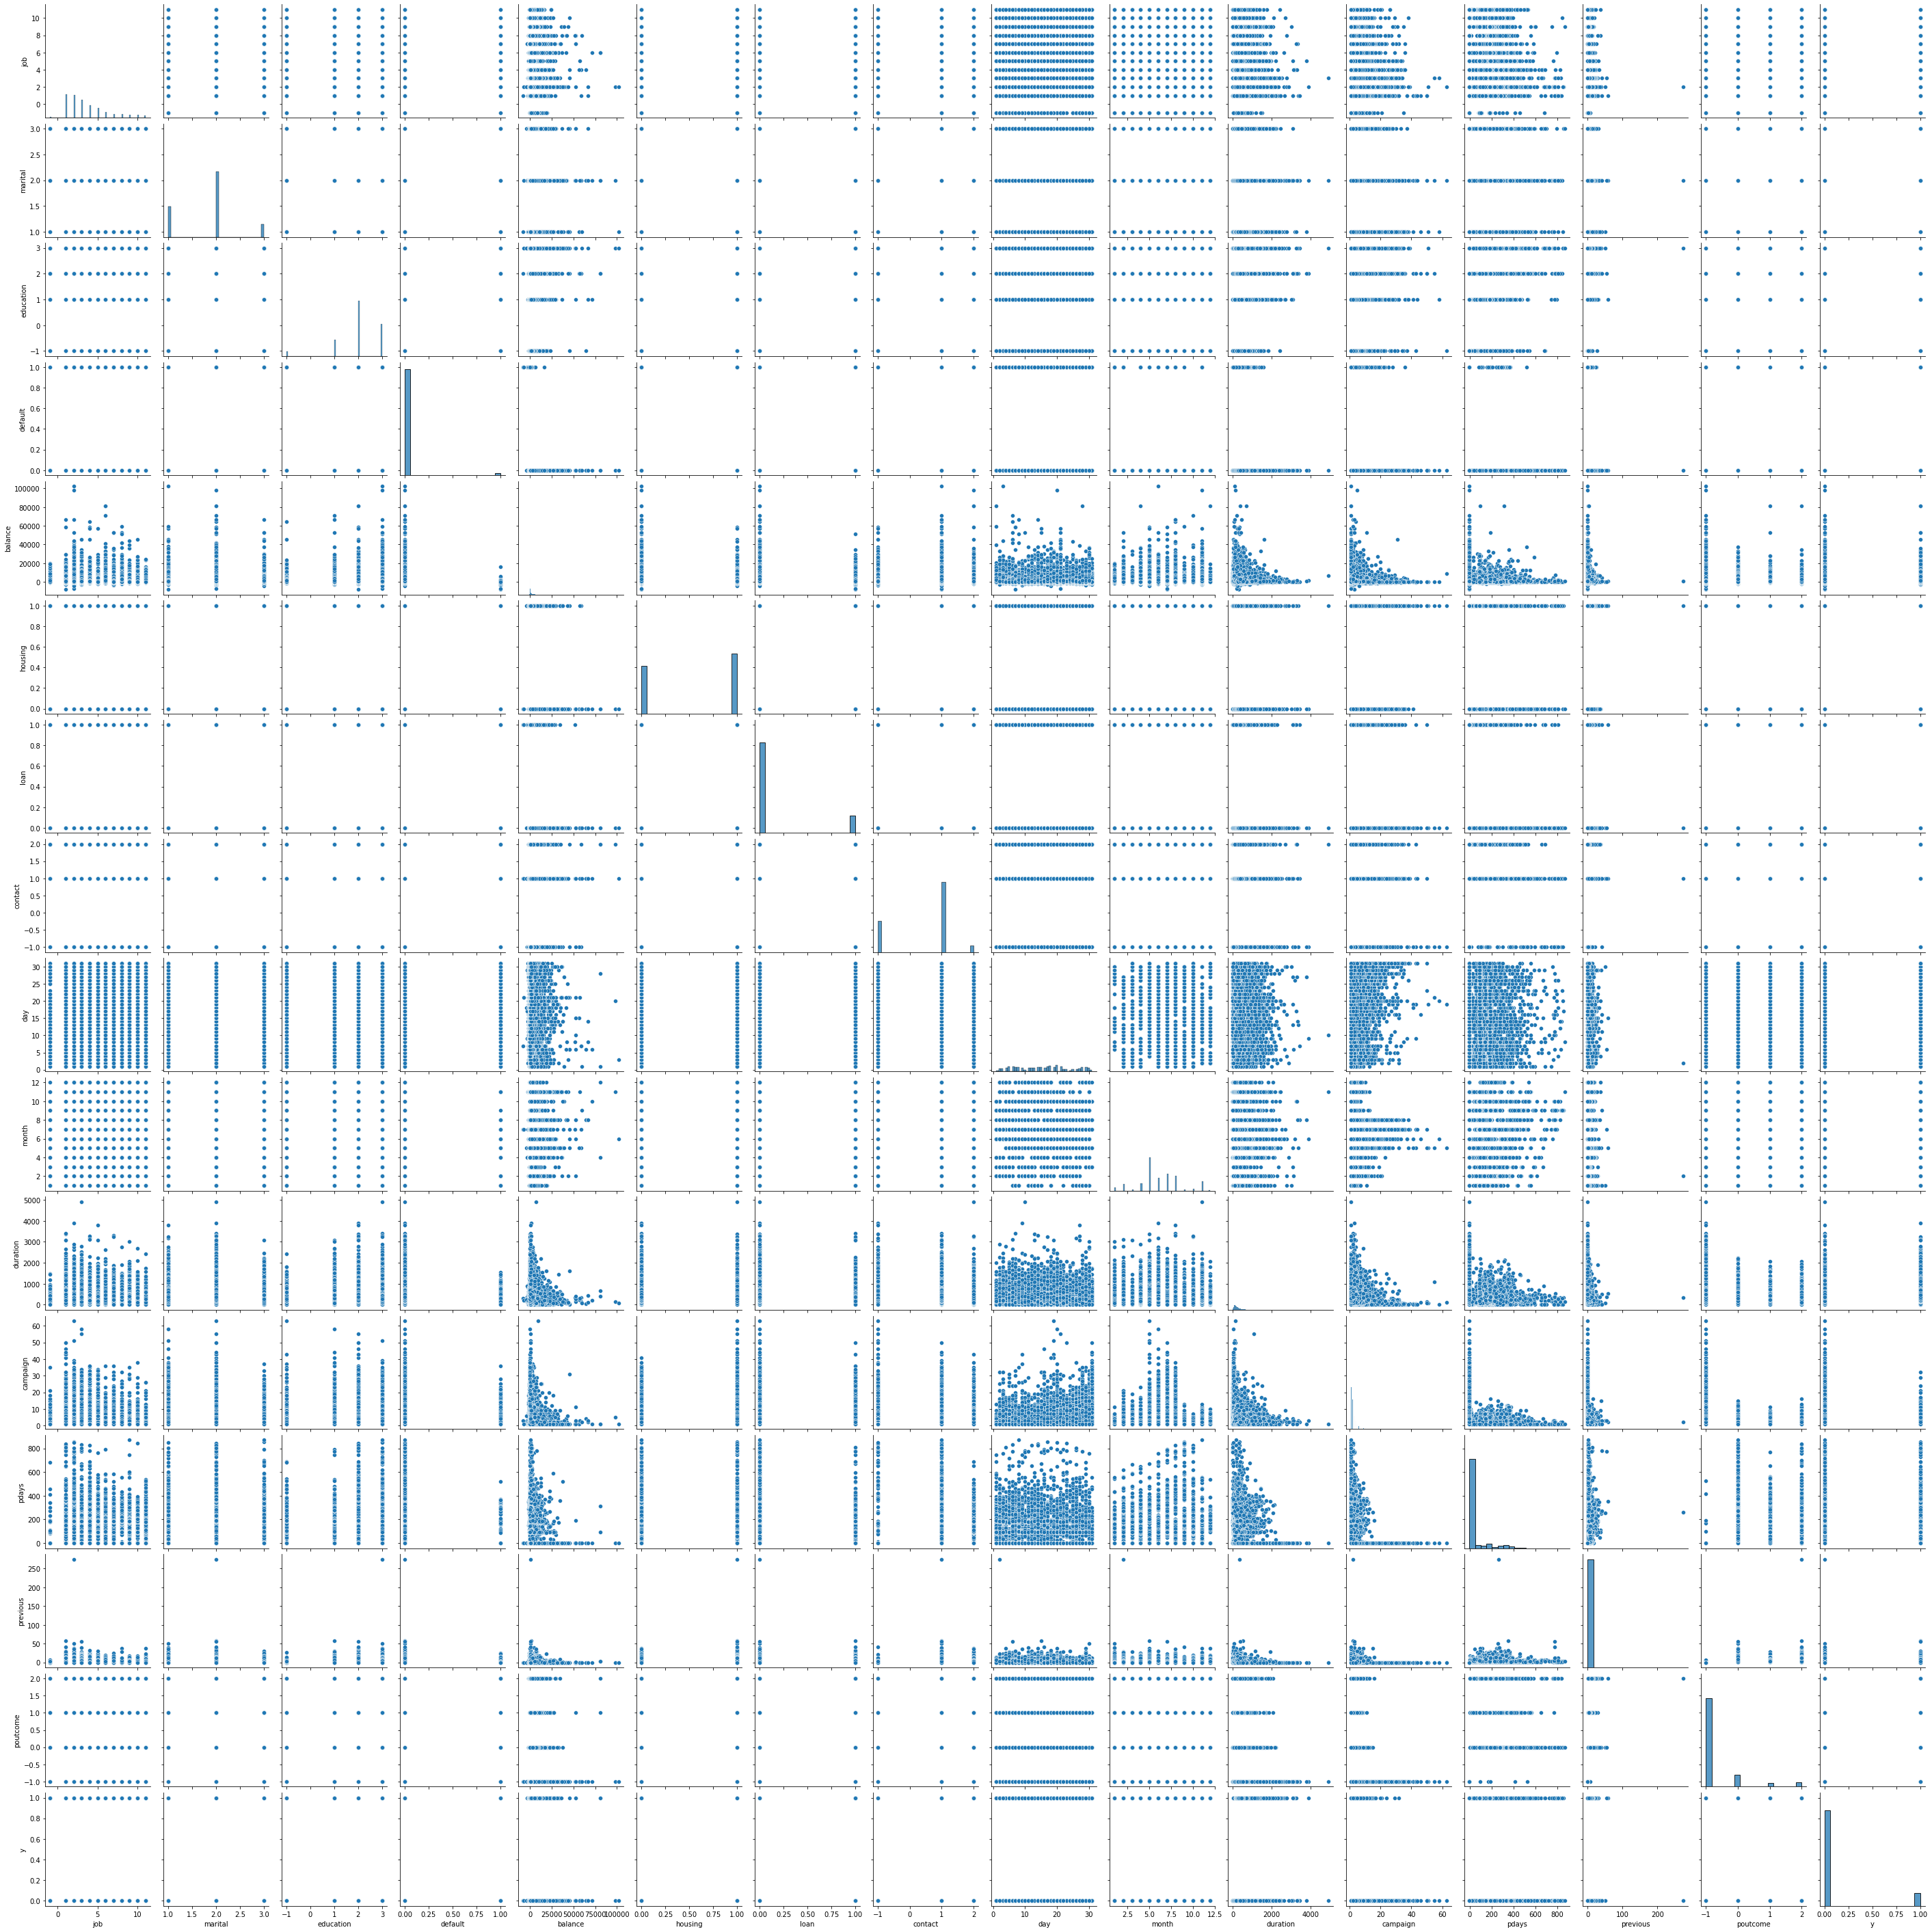

In [153]:
# visualizing pair plot to draw some insights
sns.pairplot(df.iloc[:, 1 :])

Insights from the above plotted pair plot:

1. Age: Majority of the clients are between the age of 30 and 60 years.
2. Job: Majority of the clients are blue collar workers, managers, and technicians.
3. Marital: Married clients are more likely to sign up for a term deposit.
4. Education: Majority of the clients have high level of education. Also, some clients' education level is unknown.
5. Balance: There are outliers in the balance variables.
6. Housing: Clients who do not have a mortgage are more likely to subscribe to a term deposit.
7. Duration: A good proportion is outliers.
8. Campaign: Bank contacted majority of the clients between 1 and 5 times. Clients who got contacted by the bank 20 times or more have a very low likelihood of making a term deposit.






In [154]:
# counting values of subscribers and non-subscribers
df["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

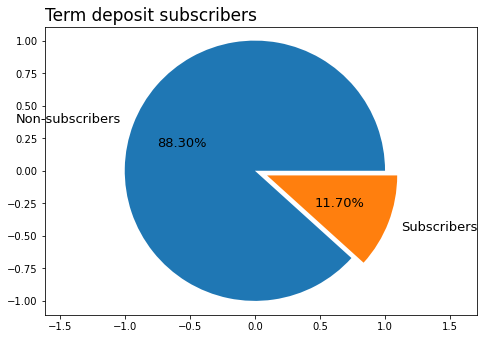

In [155]:
# visualizing subscribers and non-subscribers
labels = ["Non-subscribers", "Subscribers"]
explode = (0, 0.1)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.pie(df['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=13)) 
ax.axis('equal')
plt.title('Term deposit subscribers', loc='left',color='black', fontsize='17')
plt.show()

Clearly, the data is biased towards the non-subscribers. 

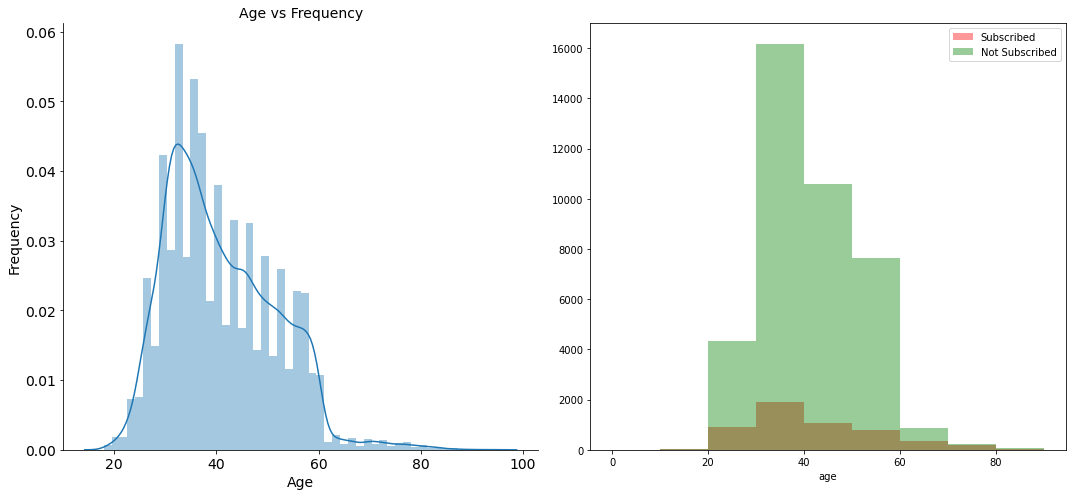

In [156]:
# plotting age distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
sns.distplot(df['age'], ax=ax1)
sns.despine(ax=ax1)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Age vs Frequency', fontsize=14)
ax1.tick_params(labelsize=14)
bins = range(0, 100, 10)
ax2 = sns.distplot(df.age[df.y==1], color='red', kde=False, bins=bins, label='Subscribed')
sns.distplot(df.age[df.y==0], ax=ax2, color='green', kde=False, bins=bins, label="Not Subscribed")
plt.legend()
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()

The age distribution is pretty normal, with a lower standard deviation. Although, the age range of the clients called by the bank is between 18 and 90, subscription rates are higher among people aged 30 to 50.

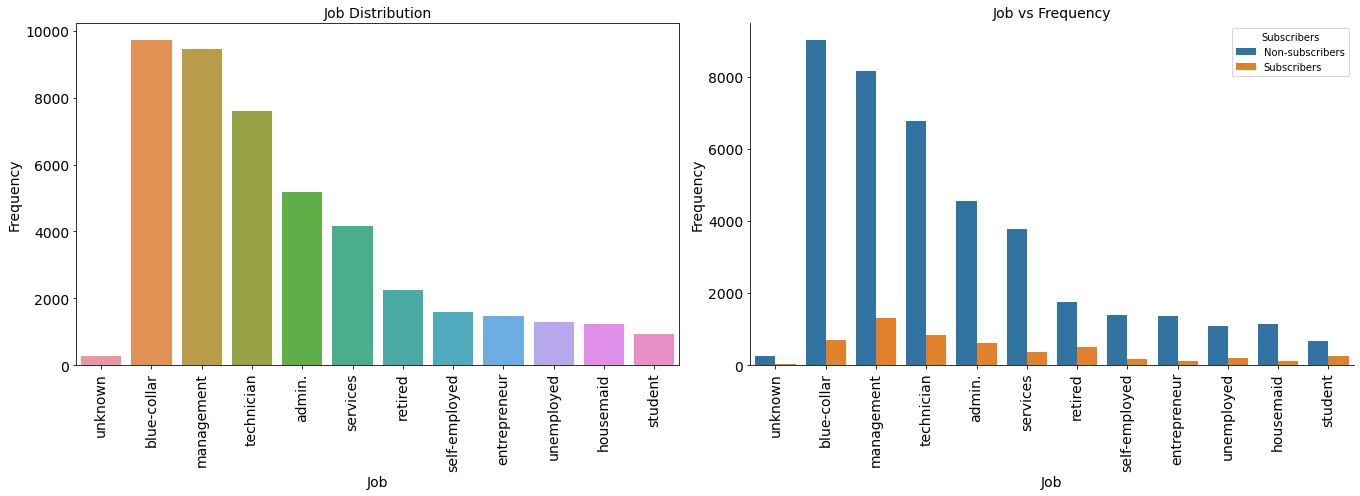

In [157]:
# plotting job distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.set_size_inches(19, 7)
sns.countplot(x='job', data=df, ax=ax1,)
ax1.set_xlabel('Job', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Job Distribution', fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(encoded_categories['job'], rotation=90)

sns.countplot(df['job'], data=df, hue='y', ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Job', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_title('Job vs Frequency', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels(encoded_categories['job'], rotation=90)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.legend(title='Subscribers', labels=["Non-subscribers", "Subscribers"])

It is important to note that students and retired people have a higher subscription rate compared to other clients. Here, we can observe that the top three job types of the clients are 'blue-collar', 'management', and 'technician'.

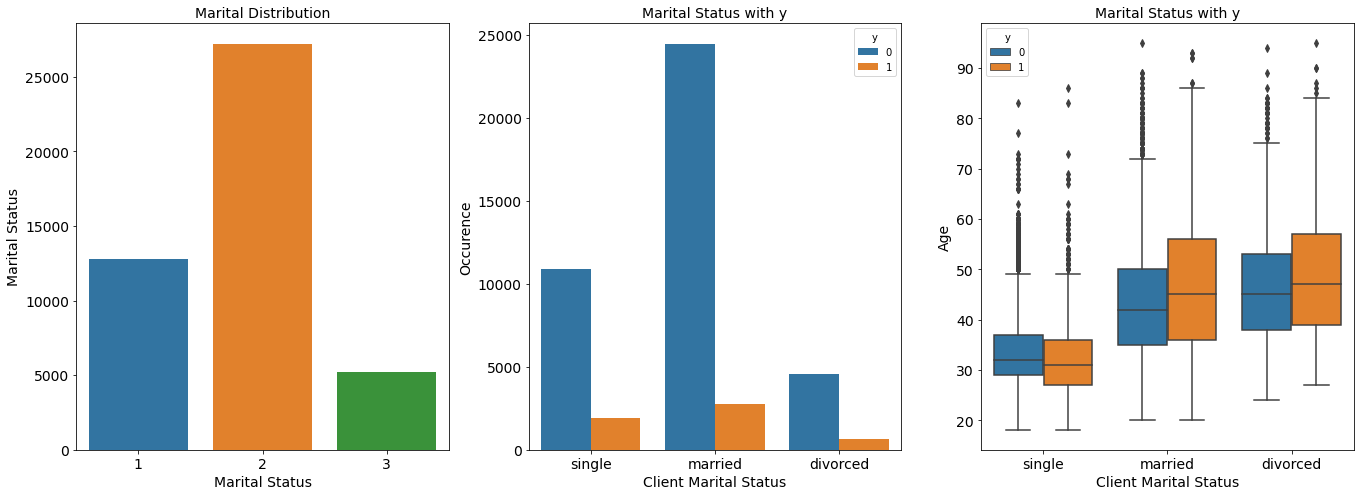

In [158]:
# plotting marital distribution
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
fig.set_size_inches(19, 7)
sns.countplot(x='marital', data=df, ax=ax1,)
ax1.set_xlabel('Marital Status', fontsize=14)
ax1.set_ylabel('Marital Status', fontsize=14)
ax1.set_title('Marital Distribution', fontsize=14)
ax1.tick_params(labelsize=14)
sns.countplot(df['marital'], data = df, hue = 'y', ax = ax2)
ax2.set_xlabel('Client Marital Status', fontsize=14)
ax2.set_ylabel('Occurence', fontsize=14)
ax2.set_title('Marital Status with y', fontsize=14)
ax2.set_xticklabels(encoded_categories['marital'])
ax2.tick_params(labelsize=14)

sns.boxplot(x='marital', y='age', hue='y', data=df, ax=ax3)
ax3.set_xlabel('Client Marital Status', fontsize=14)
ax3.set_ylabel('Age', fontsize=14)
ax3.set_title('Marital Status with y', fontsize=14)
ax3.set_xticklabels(encoded_categories['marital'])
ax3.tick_params(labelsize=14)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

Our dataset has a large number of married clients. With single clients, the subscription to term deposit ratio is favourable.

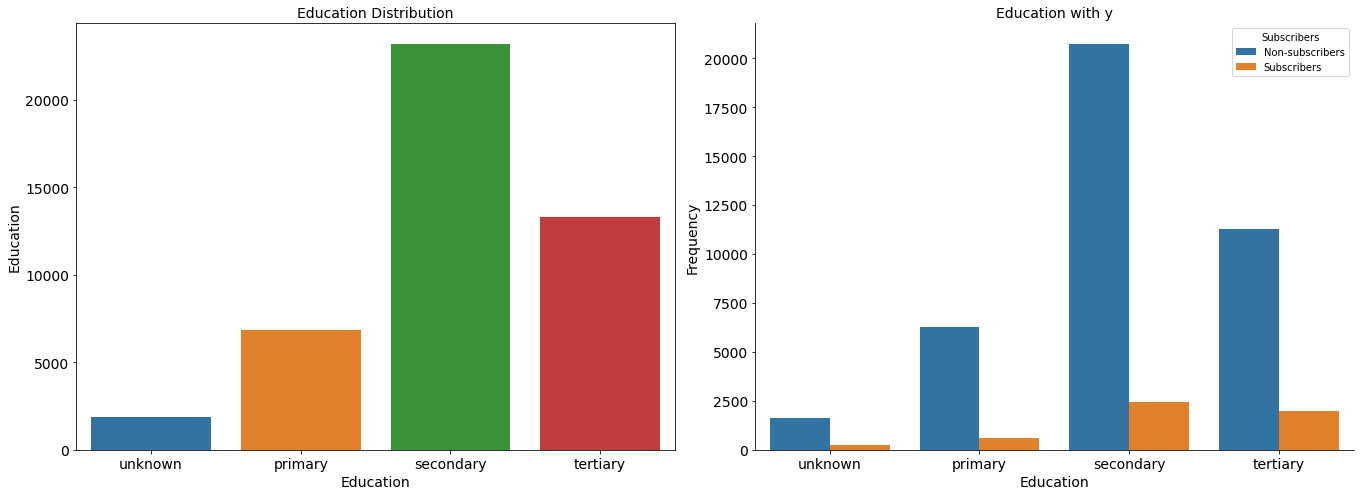

In [159]:
# plotting education distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.set_size_inches(19, 7)
sns.countplot(x='education', data=df, ax=ax1,)
ax1.set_xlabel('Education', fontsize=14)
ax1.set_ylabel('Education', fontsize=14)
ax1.set_title('Education Distribution', fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(encoded_categories['education'])

sns.countplot(df['education'], data=df, hue='y', ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Education', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
ax2.set_title('Education with y', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels(encoded_categories['education'])
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.legend(title='Subscribers', labels=["Non-subscribers", "Subscribers"])

Clients with a 'secondary' level of education outnumber those with other levels of education. Clients with 'secondary' and 'tertiary' education levels are also more inclined to subscribe to the term deposit.

Text(0.5, 1.0, 'Balance Distribution')

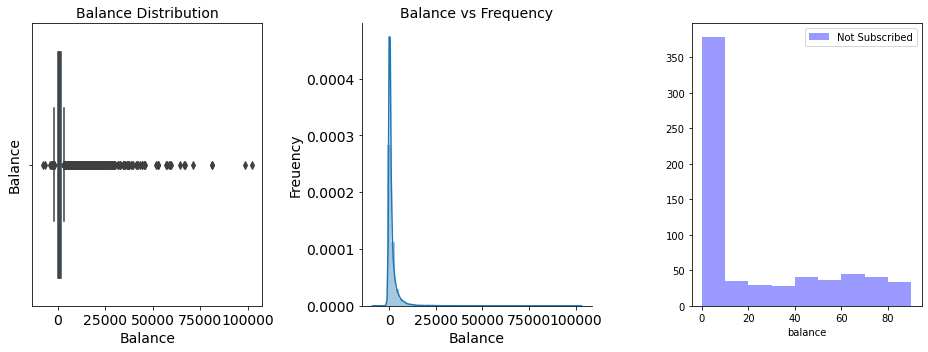

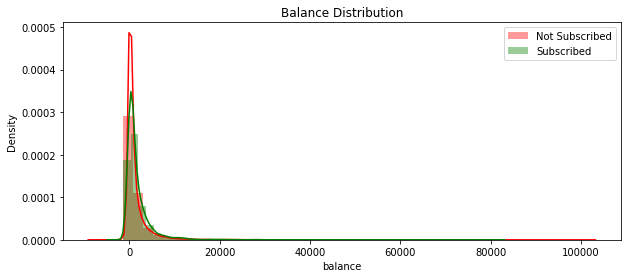

In [160]:
# plotting balance distribution
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13,5))
sns.boxplot(x='balance', data=df, orient='v', ax=ax1)
ax1.set_xlabel('Balance', fontsize=14)
ax1.set_ylabel('Balance', fontsize=14)
ax1.set_title('Balance Distribution', fontsize=14)
ax1.tick_params(labelsize=14)

sns.distplot(df['balance'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('Balance', fontsize=14)
ax2.set_ylabel('Freuency', fontsize=14)
ax2.set_title('Balance vs Frequency', fontsize=14)
ax2. tick_params(labelsize=14)

bins=range(0, 100, 10)
ax3=sns.distplot(df.balance[df.y==1], ax=ax3, color='blue', kde=False, bins=bins, label="Not Subscribed")
plt.legend()
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()

plt.figure(figsize=(10, 4))
sns.distplot(df[df["y"] == 0]['balance'], color = 'r',label="Not Subscribed")
sns.distplot(df[df["y"] == 1]['balance'], color = 'g',label='Subscribed')
plt.legend()
plt.title('Balance Distribution')

The preceding graph shows that there is a lengthy tail towards the right side of the balance variable, which would be outliers.

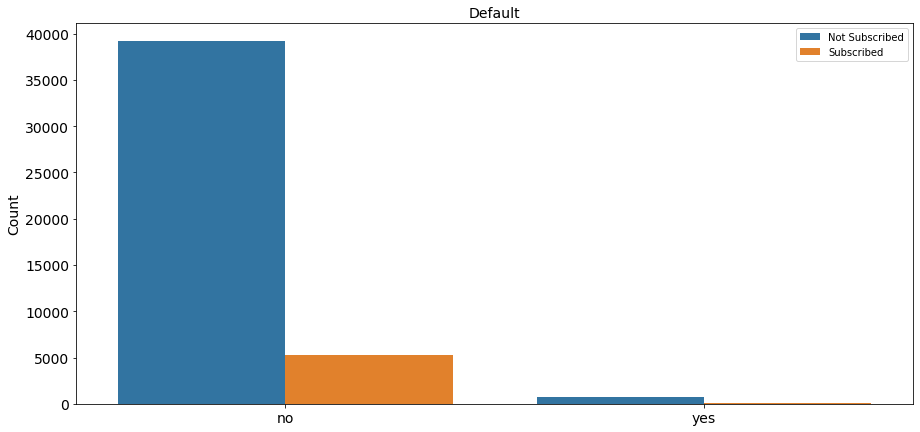

In [161]:
# plotting default distribution
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,7))
sns.countplot(x = 'default', data = df, hue='y', ax = ax1)
ax1.set_title('Default', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(encoded_categories['default'])
ax1.legend(["Not Subscribed", "Subscribed"])

Majority of clients do not have defaulted credit cards, and the number of subscribers for those who do not own a credit card is very high.

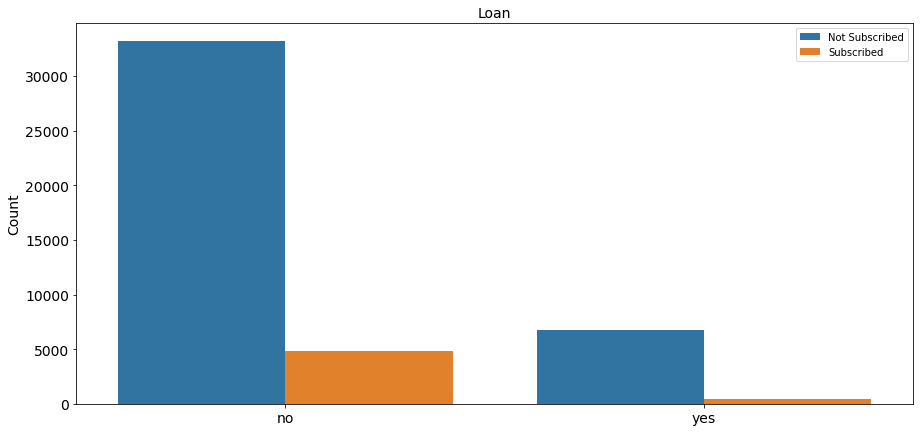

In [162]:
# plotting loan distribution
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,7))
sns.countplot(x = 'loan', data = df,  hue='y', ax = ax1)
ax1.set_title('Loan', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(encoded_categories['loan'])
ax1.legend(["Not Subscribed", "Subscribed"])

Majority of the clients do not have personal loans, and the ratio of subscribers who have and have not taken out personal loans is nearly equal.

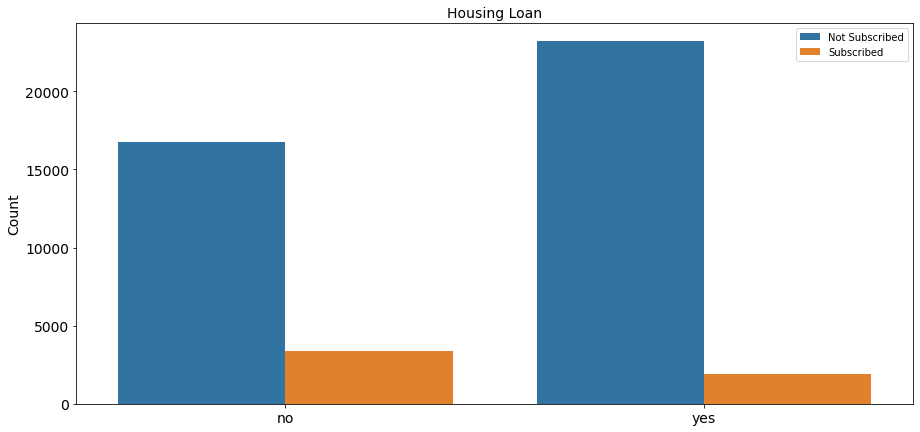

In [163]:
# plotting housing distribution
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (15,7))
sns.countplot(x = 'housing', data = df,  hue='y', ax = ax1)
ax1.set_title('Housing Loan', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(labelsize=14)
ax1.set_xticklabels(encoded_categories['housing'])
ax1.legend(["Not Subscribed", "Subscribed"])

Majority of clients have a mortgage, and those who do not have a mortgage are more likely to signup for a term deposit.

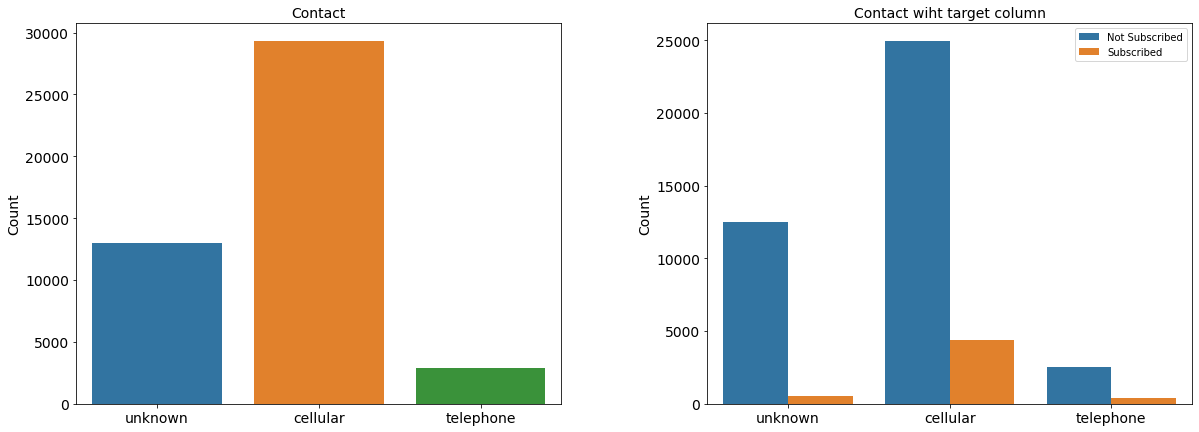

In [164]:
# plotting contact distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))

sns.countplot(x = 'contact', data = df,  ax = ax1)
ax1.set_title('Contact', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=14)
ax1.set_xticklabels(encoded_categories['contact'])
ax1.tick_params(labelsize=14)

sns.countplot(x = 'contact', data = df, hue='y', ax = ax2)
ax2.set_title('Contact wiht target column', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_xticklabels(encoded_categories['contact'])
ax2.legend(["Not Subscribed", "Subscribed"])
plt.subplots_adjust(wspace=0.3)

Majority of the clients were contacted via cell phone. Contact variable is not useful.

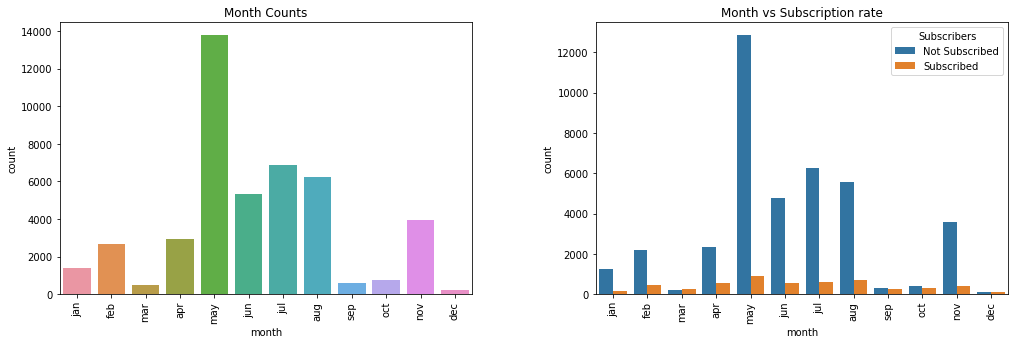

In [165]:
# plotting months distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
sns.countplot(df['month'], ax=ax1)
ax1.set_xticklabels(encoded_categories['month'], rotation=90)
ax1.set_title('Month Counts')

sns.countplot(x='month', data=df, hue='y', ax=ax2)
ax2.set_xticklabels(encoded_categories['month'], rotation=90)
ax2.set_title('Month vs Subscription rate')
plt.subplots_adjust(wspace=0.3)
plt.legend(title='Subscribers', labels=["Not Subscribed", "Subscribed"])

In March, September, October, and December, the contact rate is quite low. The majority of the clients were contacted between May and July. The greatest subscription rate was in March, while all subscription rates in September, October, and December were around 35%.

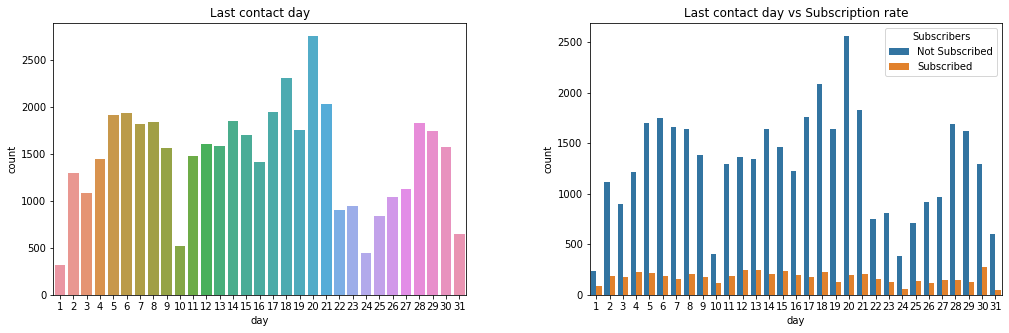

In [166]:
# plotting day distribution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
sns.countplot(df['day'], ax=ax1)
ax1.set_title('Last contact day')

sns.countplot(x='day', data=df, hue='y', ax=ax2)
ax2.set_title('Last contact day vs Subscription rate')
plt.subplots_adjust(wspace=0.3)
plt.legend(title='Subscribers', labels=["Not Subscribed", "Subscribed"])

The amount of contacts established is nearly constant across all days.

[Text(0, 0, 'no'), Text(0, 0, 'yes')]

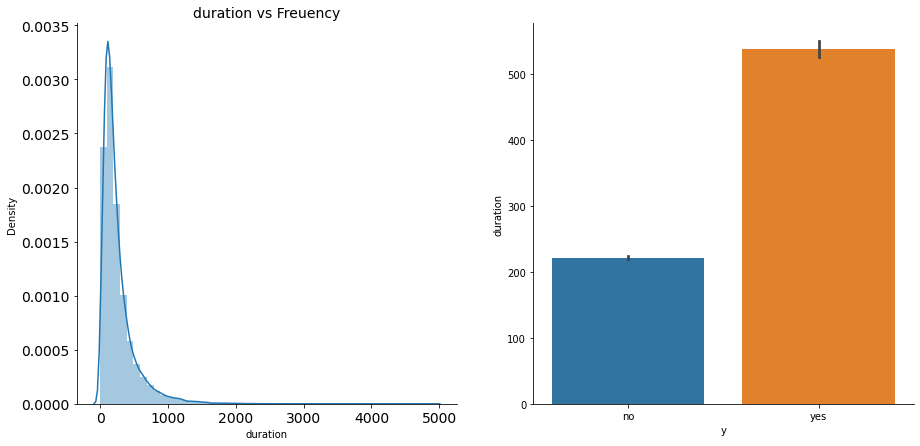

In [167]:
# plotting duration
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
sns.distplot(df['duration'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('duration vs Freuency', fontsize=14)
ax1.tick_params(labelsize=14)

sns.barplot(x="y", y="duration", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(encoded_categories['y'])

Here, we can observe the long tail towards right. It represents large number of outliers. Another important observation is that clients are more likely to sign up for a term deposit if the duration is arount 6-8 minutes.

[Text(0, 0, 'no'), Text(0, 0, 'yes')]

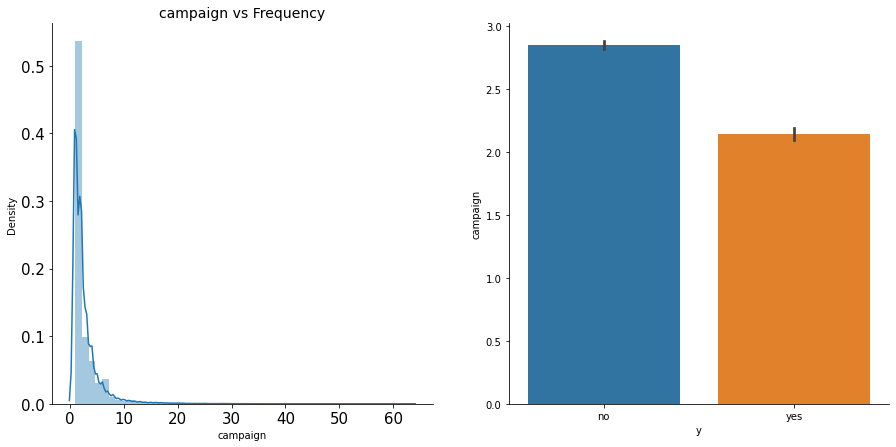

In [168]:
# plotting campaign distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
sns.distplot(df['campaign'], ax = ax1)
sns.despine(ax = ax1)
ax1.set_title('campaign vs Frequency', fontsize=14)
ax1.tick_params(labelsize=15)

sns.barplot(x="y", y="campaign", data=df, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xticklabels(encoded_categories['y'])

1/4th of the clients were contacted for the first time in their lifetime for the term deposit. 50% of the clients were contacted twice by the bank. There are some outliers who have been contacted as much as 60 times!

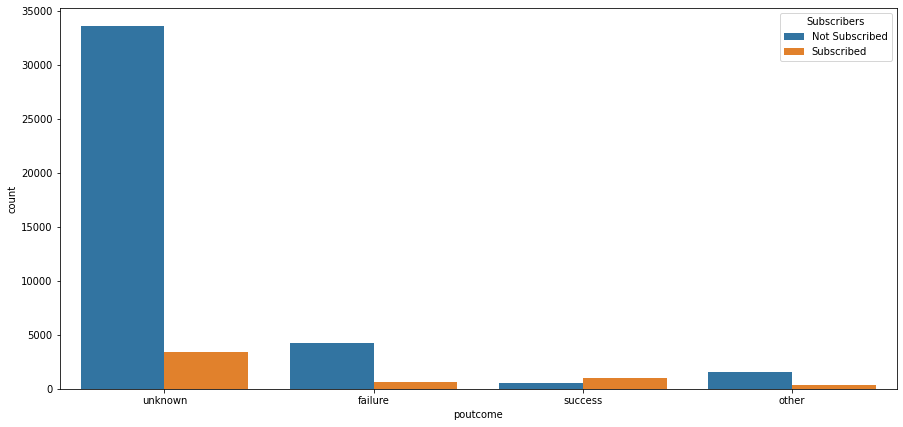

In [169]:
# plotting outcome of the previous marketing campaigns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
sns.countplot(x='poutcome', data=df, hue='y')
ax.set_xticklabels(encoded_categories['poutcome'])
plt.legend(title='Subscribers', labels=["Not Subscribed", "Subscribed"])

The preceding marketing campaign's outcome is essentially unknown. The failure rate is greater than the success rate in general.

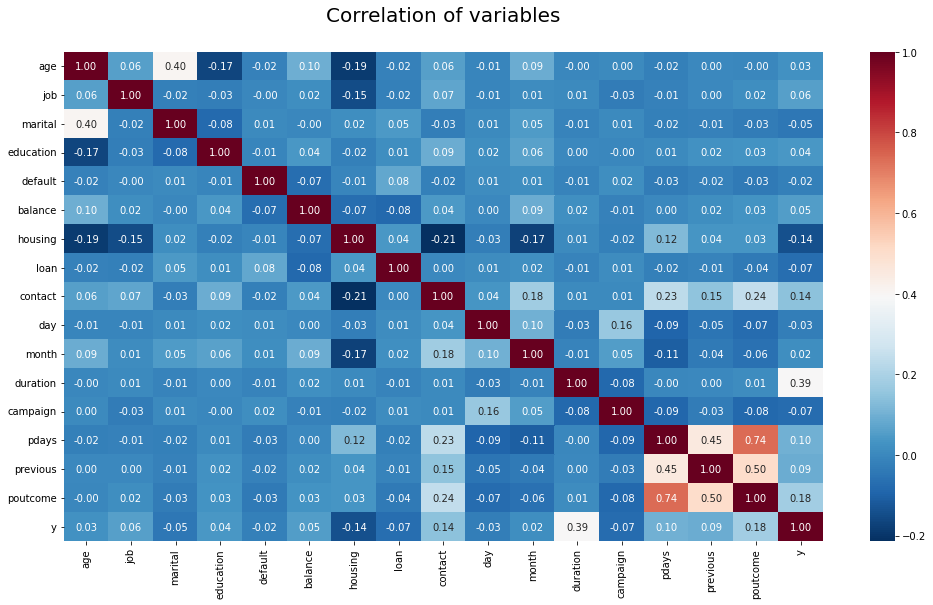

In [170]:
# plotting correlation using heatmap
plt.figure(figsize = (17, 9))
plt.title('Correlation of variables', y=1.05, size=20)
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, fmt='.2f')

'Campaign outcome' is strongly related to 'duration'. There is a decent relationship between 'Campaign outcome' and 'previous contacts'.

In [171]:
# dimensionality reduction
df = df.drop(['contact'], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,2,3,0,2143,1,0,5,5,261,1,-1,0,-1,0
1,44,3,1,2,0,29,1,0,5,5,151,1,-1,0,-1,0
2,33,8,2,2,0,2,1,1,5,5,76,1,-1,0,-1,0
3,47,1,2,-1,0,1506,1,0,5,5,92,1,-1,0,-1,0
4,33,-1,1,-1,0,1,0,0,5,5,198,1,-1,0,-1,0


# Model Building

Dropping the 'contact' variable because it's not relevant.

In [172]:
# replacing 'unknown' in the poutcome variable in order to generate meaningful insights
df.loc[df['poutcome']==-1, 'poutcome'] = 2

In [173]:
# generating dummy variables for the 'job', 'marital', and 'poutcome' variables using one-hot encoding
one_hot_dummy = ['job', 'marital', 'poutcome']
df = pd.get_dummies(df, columns=one_hot_dummy)

In [174]:
# checking columns
df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_-1',
       'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8',
       'job_9', 'job_10', 'job_11', 'marital_1', 'marital_2', 'marital_3',
       'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

In [175]:
# splitting the data into training and test data sets (80:20)
l = df.drop('y', axis=1)
m = df[['y']]
x_train, l_test, m_train, m_test = train_test_split(l, m, test_size=0.30, random_state=7)

In [176]:
# scaling data
scaled_l_train = preprocessing.scale(x_train)
scaled_l_test = preprocessing.scale(l_test)
l_train = scaled_l_train
l_test = scaled_l_test

In [177]:
# cross validation
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)

In [178]:
# Logistic Regression
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(l_train, m_train.values.ravel())

# Test data set predictions
log_reg_m_predict = log_reg.predict(l_test)
log_reg_score = log_reg.score(l_test, m_test)

log_reg_score_acc = accuracy_score(m_test, log_reg_m_predict)
log_reg_precison = precision_score(m_test, log_reg_m_predict)
log_reg_recall = recall_score(m_test, log_reg_m_predict)
log_reg_f1 = f1_score(m_test, log_reg_m_predict)

cross_validation_result = model_selection.cross_val_score(log_reg, l_train, m_train.values.ravel(), cv=kfold, scoring='accuracy')
print('\nLogistic Regression classification Report : \n',metrics.classification_report(m_test, log_reg_m_predict))


Logistic Regression classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.63      0.32      0.42      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



The prediction has a accuracy score of 90%.

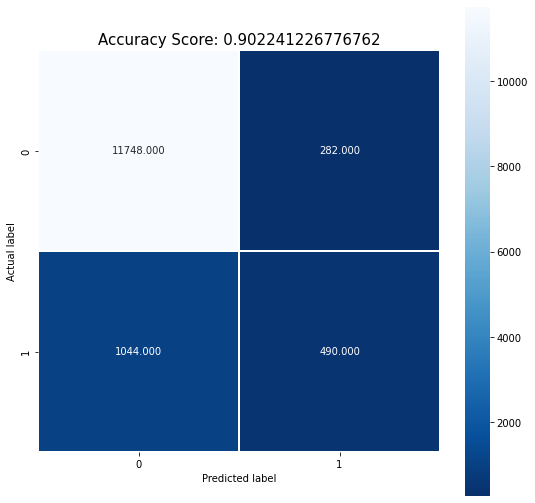

In [179]:
# creating and visualizing confusion matrix
cm = metrics.confusion_matrix(m_test, log_reg_m_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(log_reg_score_acc)
plt.title(all_sample_title, size = 15);

Here, 

* True positive is 11748
* True negative is 490
* False positive is 282 (Type I error)
* False negative is 1044 (Type II error)

The prediction had a total of 12,238 accurate results and 1,326 non-accurate results.


